In [42]:
pip install --upgrade seaborn pandas

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.6 MB 236.4 kB/s eta 0:00:47
   - -------------------------------------- 0.5/11.6 MB 236.4 kB/s eta 0:00:47
   - -------------------------------------- 0.5/11.6 MB 236.4 kB/s eta 0:00:47
   - -------------------------------------- 0.5/11.6 MB 236.4 kB/s eta 0:00:47
   - -------------------------------------- 0.5/11.6 MB 236.4 kB/s eta 0:00:47
   - -------------------------------------- 0.5/11.6 MB 236.4 kB/s eta 0:00:47
   - ------------------------------

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('Customer Churn.csv')
df
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replace blanks with 0 as tenure is 0 and no total charges are recorded

In [20]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
df.isnull().sum().sum()

0

In [23]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [24]:
df["customerID"].duplicated().sum()

0

In [25]:
def conv(value):
    if value ==1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)
    

#converted 0 and 1 values of Senior citizen to yes/no to make it easier to understand

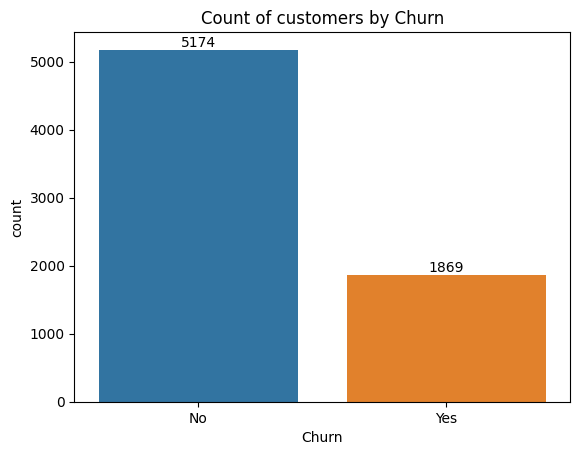

In [26]:
ax=sns.countplot(x='Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

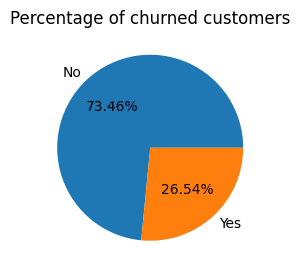

In [27]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of churned customers")
plt.show()

#From the given Pie Chart we can conclude that 26.54% of our customers have churned out.
#Let's explore the reason

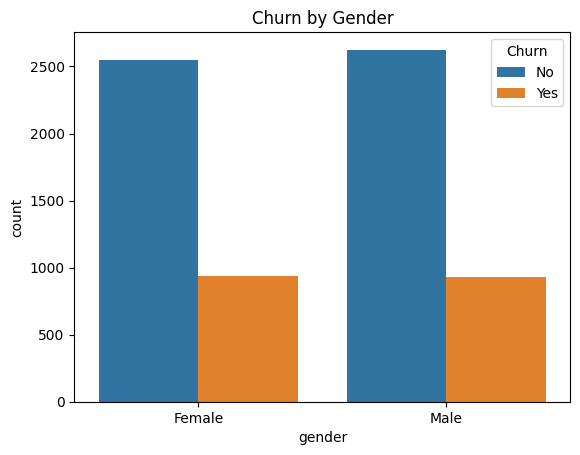

In [28]:
sns.countplot(x = "gender", data = df,hue = "Churn")
plt.title("Churn by Gender")
plt.show()

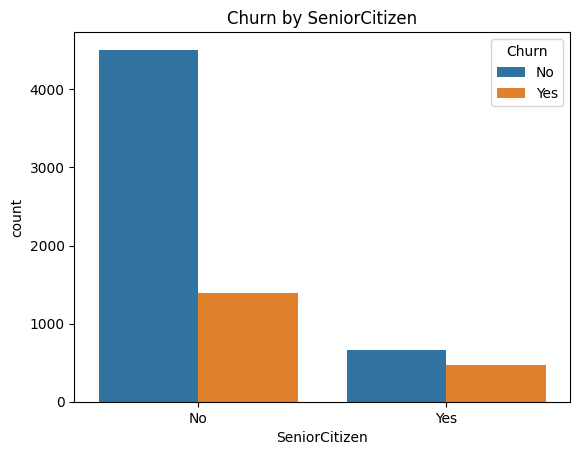

In [29]:
sns.countplot(x = "SeniorCitizen", data = df,hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

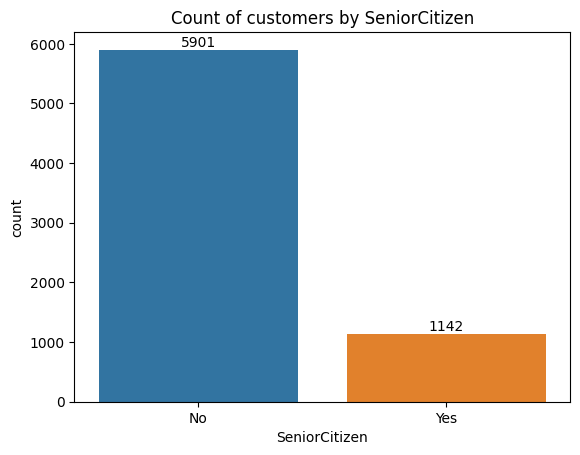

In [30]:
ax=sns.countplot(x='SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by SeniorCitizen")
plt.show()

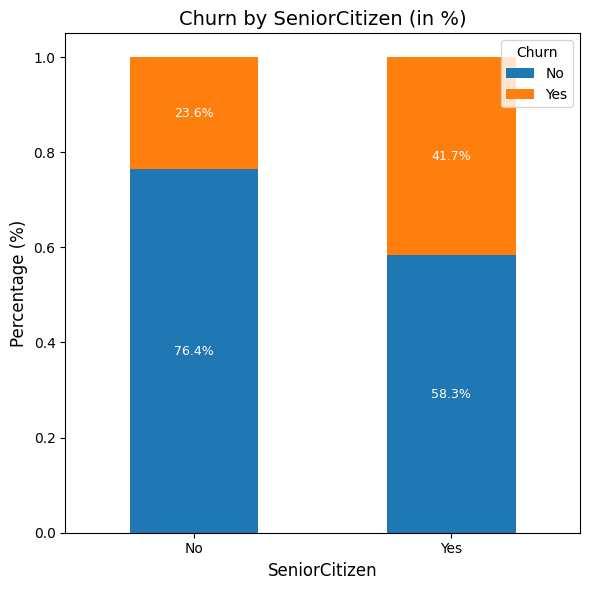

In [31]:
# Calculate the count of each group  Using Chatgpt
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()

# Plot the bars
fig, ax = plt.subplots(figsize=(6, 6))
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'], 
                  label=['No Churn', 'Churn'])  # Explicitly provide labels for legend

# Add percentage labels to the stacks
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Skip 0% sections
        ax.text(x + width / 2, y + height / 2, f'{height:.1%}', 
                ha='center', va='center', fontsize=9, color='white')

# Customize the plot
plt.title("Churn by SeniorCitizen (in %)", fontsize=14)
plt.xlabel("SeniorCitizen", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Churn", loc="upper right")
plt.tight_layout()
plt.show()

#comparatively greater % of Senior Citizen have churned

C:\Users\Tanishk Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


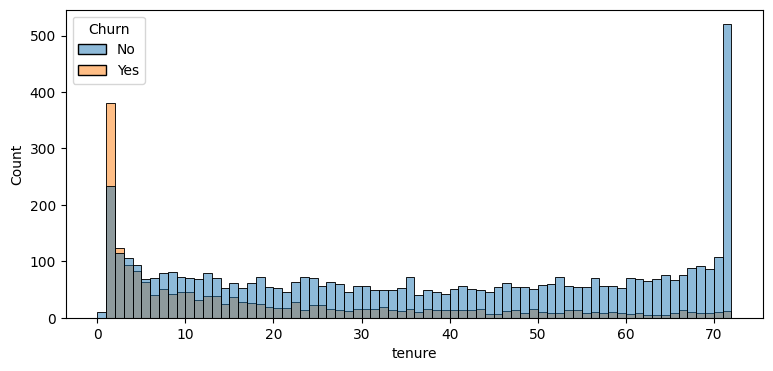

In [48]:
plt.figure(figsize = (9,4))
sns.histplot(x="tenure", data=df, bins = 72, hue = "Churn")
plt.show()

#People who have used our services for a long time stayed and people who have used our services for 1 or 2 months have churned

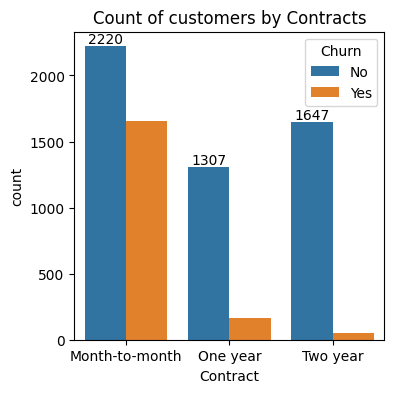

In [54]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Contracts")
plt.show()

In [55]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

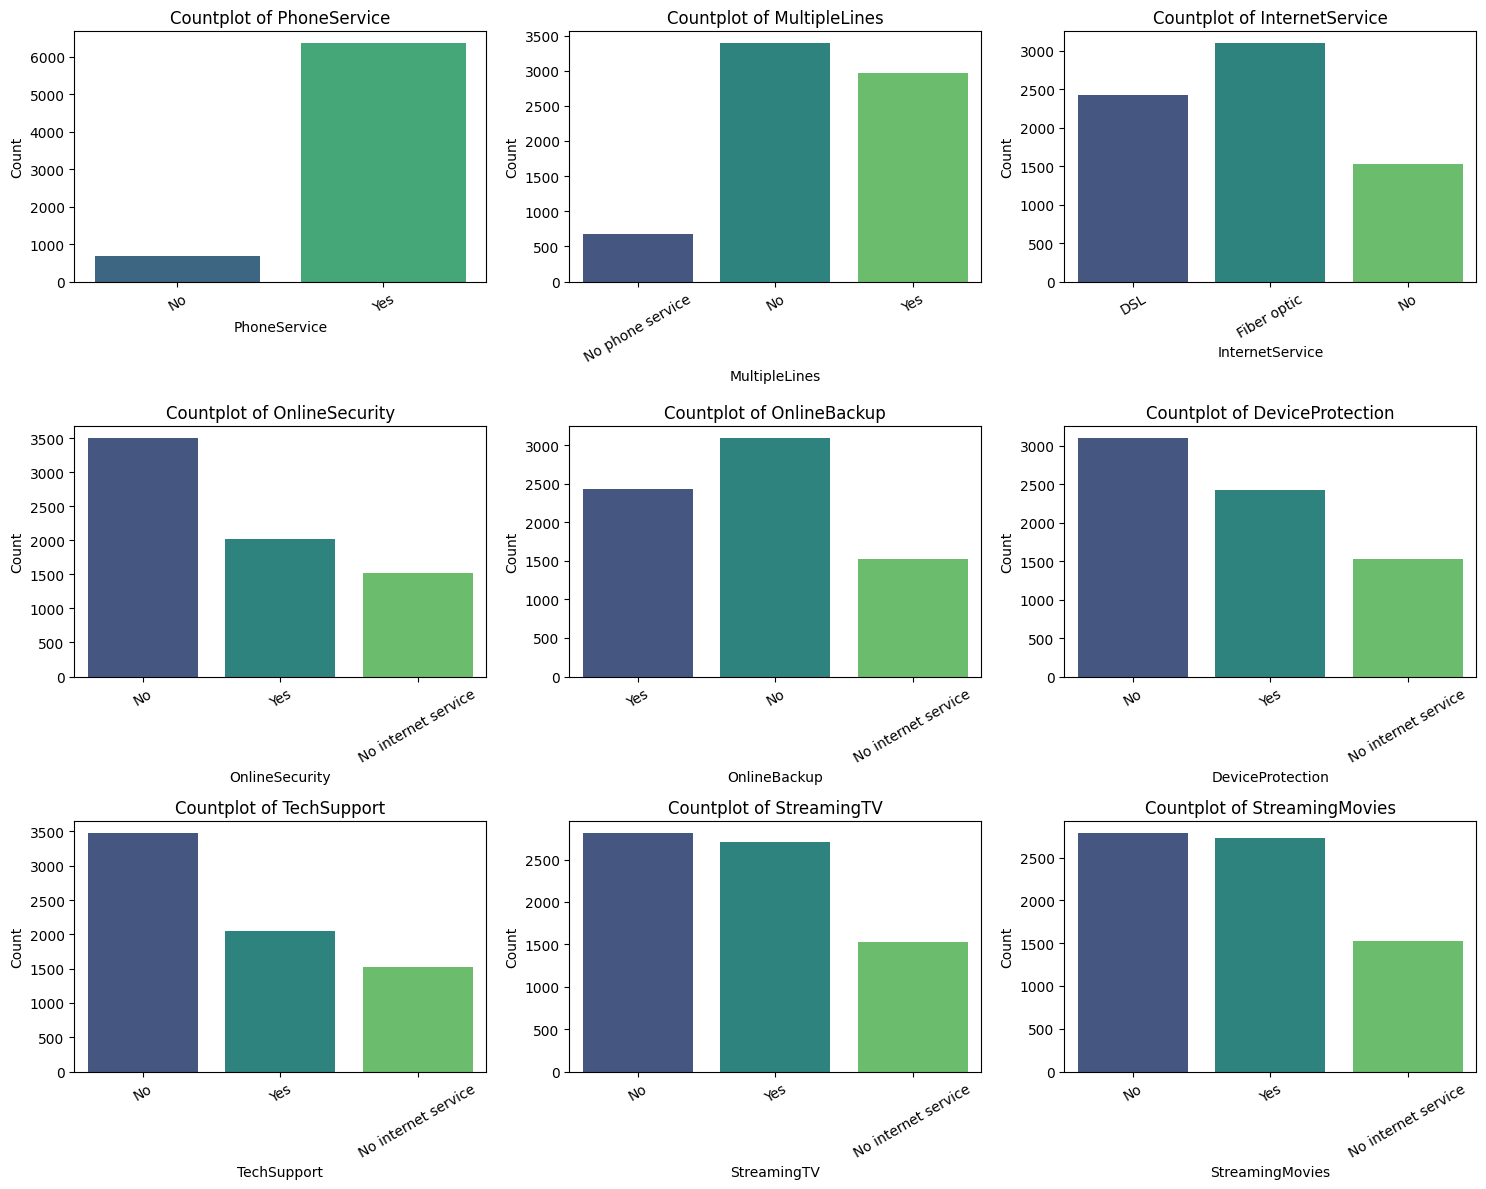

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
columns = [
    'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Determine the grid layout
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(columns) + n_cols - 1) // n_cols 

# Dynamically set the figure size
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Plot countplots
for col, ax in zip(columns, axes):
    sns.countplot(data=df, x=col, ax=ax, palette="viridis")
    ax.set_title(f"Countplot of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# Remove any unused subplots if the grid is larger than the number of columns
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for clarity
plt.tight_layout()
plt.show()
